In [1]:
from pandas import Series
!python -m venv env_eda_example

In [2]:
!source env_eda_example/bin/activate

In [4]:
!pip install -r requirements.txt

**Loading the data set**

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import Series

In [40]:
data = pd.read_csv("data/employees.csv")
data.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


**Basic data inspection**

In [9]:
# Get basic information about the stored data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [10]:
# Get basic statistics of the numerical features
data.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [11]:
# Get basic information of the other columns
data.describe(include="O")

,First Name,Gender,Start Date,Last Login Time,Senior Management,Team
count,933,855,1000,1000,933,957
unique,200,2,972,720,2,10
top,Marilyn,Female,10/30/1994,1:35 PM,True,Client Services
freq,11,431,2,5,468,106


In [21]:
# Inspect the number of unique values per column
data.nunique().sort_values()

Gender                 2
Senior Management      2
Team                  10
First Name           200
Last Login Time      720
Bonus %              971
Start Date           972
Salary               995
dtype: int64

In [24]:
data.isnull().sum().sort_values(ascending=False)

Gender               145
First Name            67
Senior Management     67
Team                  43
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
dtype: int64

**Oberservations:**
=> For four columns (Gender, First Name, Senior Management and Team) we have multiple rows with missing values
=> Handling these missing values there can be several cases like dropping the rows containing NaN or replacing NaN with either mean, median, mode, or some other value

### Gender

Alternative 1: fill nan values with "No Gender"

In [ ]:
#data["Gender"].fillna("No Gender", inplace = True)

Alternative 2: try to infer the gender by the first name

In [33]:
data[data["Gender"].isna()]["First Name"]

Series([], Name: First Name, dtype: object)

In [41]:
# Prepare dictionaries with name <> gender associations
male_names = {"Richard", "Steve", "Matthew", "Charles", "Peter", "Jimmy", "Nicholas"}
female_names = {"Jessica", "Deborah", "Sarah", "Helen", "Barbara", "Beverly"}

def infer_gender(row: Series) -> str:
    if not pd.isna(row["Gender"]):
        return row["Gender"]

    if pd.isna(row["First Name"]):
        return "No Gender"

    if row["First Name"] in male_names:
        return "Male"
    elif row["First Name"] in female_names:
        return "Female"
    else:
        return "No Gender"

# Apply the defined function per row
data["Gender"] = data.apply(infer_gender, axis=1)

In [43]:
data["Gender"].value_counts()

Gender
Female       443
Male         433
No Gender    124
Name: count, dtype: int64

### Senior Management

In [44]:
data["Senior Management"].value_counts()

Senior Management
True     468
False    465
Name: count, dtype: int64

In [46]:
mode = data['Senior Management'].mode().values[0]
data["Senior Management"].replace(np.nan, mode, inplace=True)

In [47]:
data.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

### First Name and Team

For both columns, the first name and team, we cannot fill the missing values with arbitrary data, so, let’s drop all the rows containing these missing values.

In [49]:
# Ignore all rows with nan values in Team and First Name
data = data[(data["Team"].notna()) & (data["First Name"].notna())]

In [0]:
# Drop all rows which have an nan value in any column
#data.dropna(axis = 0, how='any', inplace=True)

In [50]:
data.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         899 non-null    object 
 1   Gender             899 non-null    object 
 2   Start Date         899 non-null    object 
 3   Last Login Time    899 non-null    object 
 4   Salary             899 non-null    int64  
 5   Bonus %            899 non-null    float64
 6   Senior Management  899 non-null    bool   
 7   Team               899 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 57.1+ KB


### Data Visualization

First inspect the value distribution of single columns / features

<Axes: xlabel='Salary', ylabel='Count'>

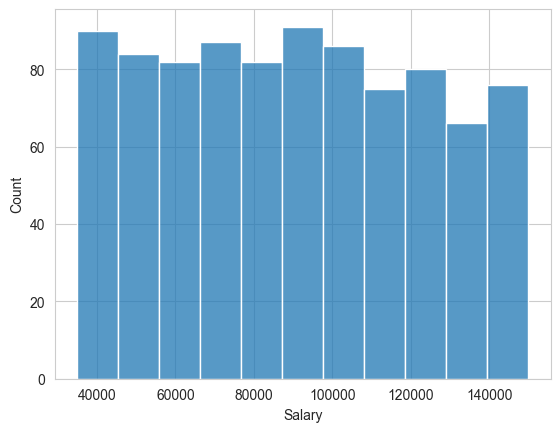

In [54]:
sns.histplot(data, x="Salary")

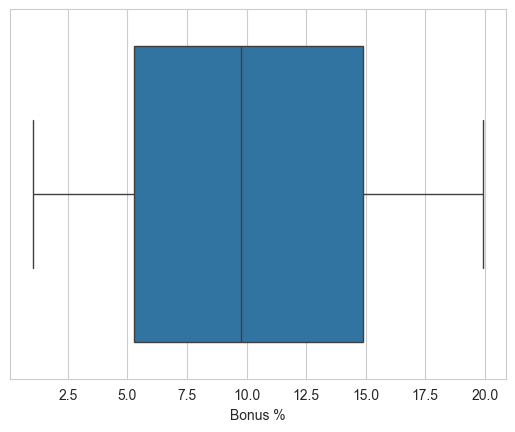

In [61]:
_ = sns.boxplot(data, x="Bonus %")

/var/folders/3z/yvm21nkx65n2wpp5dv0cq7zc0000gn/T/ipykernel_74934/267793397.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


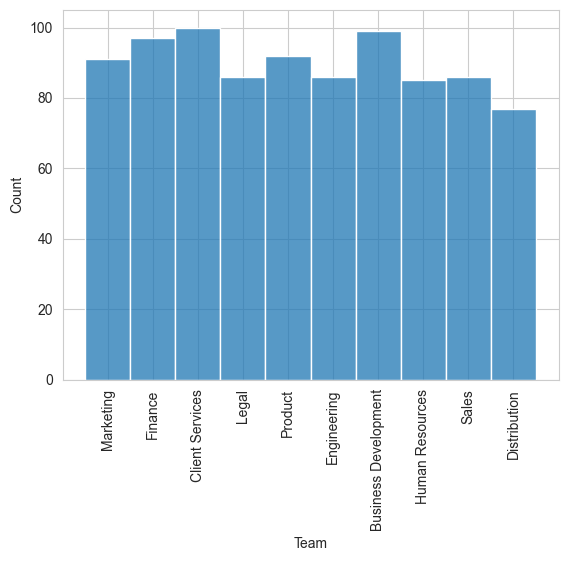

In [71]:
ax = sns.histplot(data, x="Team")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

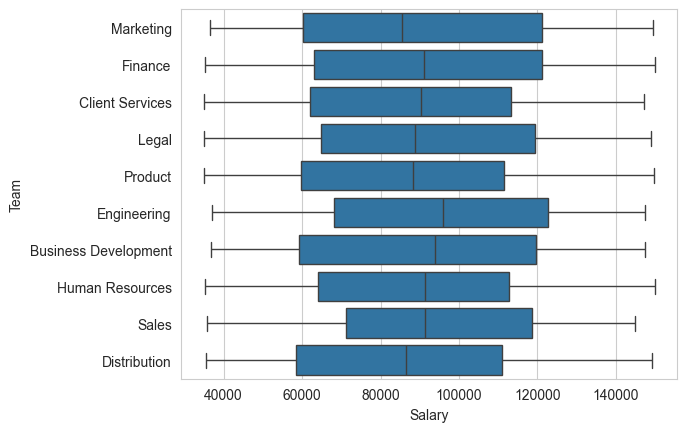

In [72]:
_ = sns.boxplot(data, x="Salary", y='Team')

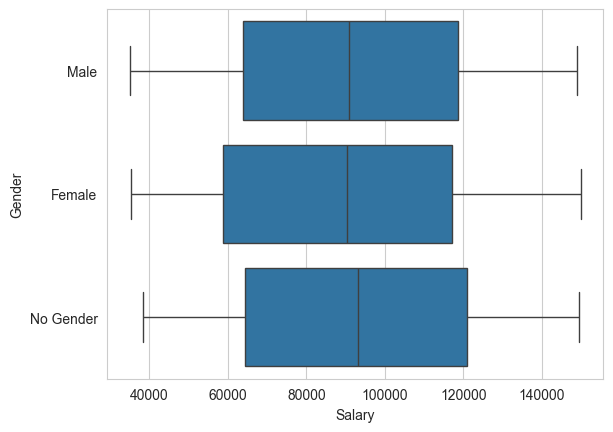

In [73]:
_ = sns.boxplot(data, x="Salary", y='Gender')